# School Budgeting with Machine Learning in Python 

Data science isn't just for predicting ad-clicks. It's also useful for social impact! This is a case study from a machine learning competition on DrivenData. I'll explore a problem related to school district budgeting. By building a model to automatically classify items in a school's budget, it makes it easier and faster for schools to compare their spending with other schools. I'll begin by building a baseline model that is a simple, first-pass approach. In particular, I'll do some natural language processing to prepare the budgets for modeling. Next, I'll have the opportunity to try more techniques and see how they compare to participants from the competition. Finally, I'll see how the winner who submitted his model at Driven Data was able to combine a number of expert techniques to build the most accurate model.


How do you accurately classify line-items in a school budget based on what that money is being used for? You will explore the raw text and numeric values in the dataset, both quantitatively and visually. I will also measure success when trying to predict class labels for each row of the dataset.


###### Introducing the challenge

School budgets in the United States are incredibly complex and there are no standard s for reporting how money is spent. Schools want to be able to measure their performance, for example, are we spending more on textbooks than our neighboring schools and is that investment worthwhile. However, to do this comparison takes hundreds of hours each year in which analysts hand categorize each line-item. The goal here is to build a machine learning algorithm that can automate that process. For each line item, there are some text fields that tell us about the expense, for example, a line might say something like ‘Algebra books for 8th grade students’. There is also amount of the expenses in dollars. This line item then has a set of labels attached to it. For example, this one might have labels like ‘Textbooks’, ‘Math’, and Middle Schools. These labels are the target variables. This is a supervised learning problem where we want to use correctly labeled data to build an algorithm that can suggest labels for unlabeled lines. This is in contrast to an unsupervised learning problem where we don’t have labels and we are using an algorithm to automatically which line-items might go together. For this problem there are over 100 unique target variables that could be attached to a single line item. Because we want to predict a category for each line item, this is a classification problem. This is as opposed to a regression problem where we want to predict a numeric value for a line item, for example, predicting house prices. Some of the categories that we want to determine are the expenses like pre-kindergarten education – which is important because it has different funding sources.  Or is there a particular student_type that this expense supports. Overall there are 9 columns with many different possible categories in each column. It is impossible for humans to label these line items with 100% accuracy. We don’t want our algorithm to just say this line is for textbooks. We want it to say, its most likely this line is for textbooks and I am 60% sure that it is. If its not textbooks, I’m 30% sure its office supplies. By making these suggestions analysts can prioritize their time. This is called a human-in-the-loop machine learning system. We will predict a probability between 0 (the algorithm thinks this label is very unlikely for this line item) and 1 (the algorithm thinks this label is very likely). 


###### What category of problem is this?

let's make sure we agree on the basics.

I am going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. Function: Career & Academic Counseling, or Position_Type: Librarian.

The goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

What type of machine learning problem is this?

Reinforcement Learning, because the model is learning from the data through a system of rewards and punishments.

Unsupervised Learning, because the model doesn't output labels with certainty.

Unsupervised Learning, because not all data is correctly classified to begin with.

Supervised Learning, because the model will be trained using labeled examples.

Using correctly labeled budget line items to train means this is a supervised learning problem.



###### What is the goal of the algorithm?

There are different types of supervised machine learning problems. Here I will identify what type of supervised machine learning problem this is, and why I think so.

Remember, the goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

Regression, because the model will output probabilities.


Classification, because predicted probabilities will be used to select a label class.

Specifically, we have ourselves a multi-class-multi-label classification problem (quite a mouthful!), because there are 9 broad categories that each take on many possible sub-label instances.


Regression, because probabilities take a continuous value between 0 and 1.


Classification, because the model will output probabilities.



Exploring the Data 

Lastly I said that we’d be predicting probabilities for each budget line item. Let me clarify how it looks in practice. For example, if we are predicting the hair type and eye color of people. We have the categories “curly”, “straight” and “wavy” for hair and “brown” and “blue” for eyes. If we are predicting probabilities, we need a value for each possible value in each column. In this case the target would have the columns for each hair type and for each eye color. Later I will explore how to perform this transformation.  


###### Loading the data

Now it's time to check out the dataset! I'll use pandas (which has been pre-imported as pd) to load the data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

The training data is available as TrainingData.csv. The first task is to load it into a DataFrame in the IPython Shell using pd.read_csv() along with the keyword argument index_col=0.

Using methods such as .info(), .head(), and .tail() to explore the budget data and the properties of the features and labels.

Some of the column names correspond to features - descriptions of the budget items - such as the Job_Title_Description column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item labels I will be trying to predict with the model. For example, the Object_Type column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Using df.info() in the IPython Shell to answer the following questions:

How many rows are there in the training data?
400277
How many columns are there in the training data?
25
How many non-null entries are in the Job_Title_Description column?
292743

In [18]:
importing pandas as pd 
df = pd.read_csv('TrainingData.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
Function                  400277 non-null object
Use                       400277 non-null object
Sharing                   400277 non-null object
Reporting                 400277 non-null object
Student_Type              400277 non-null object
Position_Type             400277 non-null object
Object_Type               400277 non-null object
Pre_K                     400277 non-null object
Operating_Status          400277 non-null object
Object_Description        375493 non-null object
Text_2                    88217 non-null object
SubFund_Description       306855 non-null object
Job_Title_Description     292743 non-null object
Text_3                    109152 non-null object
Text_4                    53746 non-null object
Sub_Object_Description    91603 non-null object
Location_Description      162054 non-null object
FTE                       126071 non-null float64
Func

In [57]:
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


Looks like there are a lot of missing values. We will need to keep our eyes on those.

###### Summarizing the data

I'll continue the EDA in this exercise by computing summary statistics for the numeric data in the dataset. 

We can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called FTE and Total.

FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.
After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.



                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


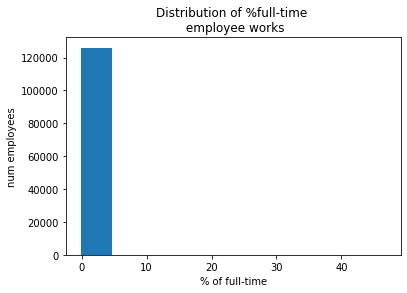

In [28]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.


###### Exploring datatypes in pandas

It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

The data has been loaded into the workspace as df. Your job is to look at the DataFrame attribute .dtypes in the IPython Shell, and call its .value_counts() method in order to answer the question below.

Make sure to call df.dtypes.value_counts(), and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

How many columns with dtype object are in the data?

In [19]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

That's a lot of (slow) object types. Let's do some type conversion!

In [20]:
LABELS = ['Function',
 'Use',
 'Sharing',
 'Reporting',
 'Student_Type',
 'Position_Type',
 'Object_Type',
 'Pre_K',
 'Operating_Status']

In [21]:
df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [15]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


In [ ]:
WE're getting close to something we can work with.

In [ ]:
###### Counting unique labels

There are over 100 unique labels. Here I will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe df and the LABELS list have been loaded into the workspace; the LABELS columns of df have been converted to category types.

pandas, which has been pre-imported as pd, provides a pd.Series.nunique method for counting the number of unique values in a Series.

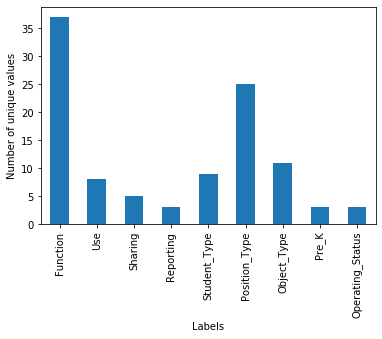

In [23]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)


# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

###### How do we measure success?

Choosing how to evaluate the machine learning model is one of the most important decisions an analyst makes. The decision balances the real-world use of the algorithm, the mathematical properties of the evaluation function, and the interpretability of the measure. Often we hear how accurate is the model. Accuracy is a simple measure that tells us what percentage of rows we got right. However, sometimes accuracy doesn’t tell the whole story. 

In some cases we use the metric log loss. Log loss is what is generally called a “loss function” and it is a measure of error. The error should be as small as possible, which is the opposite of a metric like accuracy where we want to maximize the value. Log loss takes the actual value 1 or 0 and takes our prediction which is a probability between 0 and 1. 


###### Penalizing highly confident wrong answers

log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.

Suppose you have the following 3 examples:

A:y=1,p=0.85
    
B:y=0,p=0.99
    
C:y=0,p=0.51
    
Select the ordering of the examples which corresponds to the lowest to highest log loss scores. y is an indicator of whether the example was classified correctly. You shouldn't need to crunch any numbers!

a - Lowest: A, Middle: B, Highest: C.
            

b - Lowest: C, Middle: A, Highest: B.
            

c- Lowest: A, Middle: C, Highest: B.
This is correct. 
            

d - Lowest: B, Middle: A, Highest: C.



Confident and wrong predictions are highly penalized, resulting in a higher log loss.

Of the two incorrect predictions, B will have a higher log loss because it is confident and wrong.

B is both wrong and confident. It will not have the lowest log loss.

###### Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss(). 

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

The job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.

In [50]:
actual_labels = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])

correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])

correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])

wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])

wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])



In [51]:
# Computing log loss with NumPy

import numpy as np
def compute_log_loss(predicted, actual, eps=0.00000000000001):
    """ Computes the logarithmic loss between predicted and 
        actual when these are 1D arrays. 

      : param predicted: The predicted probabilities as floats between 0-1
      : param actual: The actual binary labels, Either 0 or 1.
      : param eps (optional): log(0) is inf, so we need to offset our
                              predicted values slightly by eps from 0 or 1. 
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
              + (1 - actual)
              * np.log(1 - predicted))
    return loss 


In [52]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on the models. 

###### Creating a simple first model

I'll build a first-pass model. I'll use numeric data only to train the model. Spoiler alert - throwing out all of the text data is bad for performance! But I'll learn how to format the predictions. Then, I'llintroduce natural language processing (NLP) in order to start working with the large amounts of text in the data.

###### It’s time to build a model

It’s always a good approach to start from a very simple model. I will start with a model that will just use the numeric data columns. I’ll go from raw data to predictions as quickly as possible. I’ll use multi-class logistic regression which treats each label as independent. The model will train a logistic regression classifier for each of these columns separately and then use those models to predict whether the label appears or not for any given rows. First the data is split into a training set and a test set. However, because of the nature of the data here, the simple approach to a train-test split won’t work. Some labels only appear in a small fraction of the dataset. If I split the dataset randomly I may end up with labels in the dataset that never appeared in the training set. The model will never be able to predict a class that it has never seen before. One approach to this problem is called StratifiedShufleSplit. However this scikit-learn function only works if we have a single target variable. In this case we have many target variables. To work around this issue, there is a utility function: multilabel_train_test_split() that will ensure that all of the classes are represented in both the test and training sets. 

First I’ll subset the data to just the numeric columns. NUMERIC_COLUMNS is a variable that will contain a list of the column names for the columns that are numbers rather than text. Then I will do a minimal amount of preprocessing where I’ll fill the NaNs that are in the dataset with -1000. I chose -1000 to let the algorithm respond to NaN’s differently than 0. I’ll create the array of target variables using the get dummies function is pandas. Again the get_dummies function takes the categories and produces a binary indicator for our targets which is the format that scikit-learn needs to build a model. Finally I will use the multilabel_train_test_split function that is designed to split the dataset in to a training set and a test set. 

I’ll import LogisticRegression and OneVsRestClassifier from the sklearn.multiclass module. OneVsRest lets us treat each column of y independently. Essentially it fits a separate classifier for each of the columns. This is just one strategy we can use if we have multiple classes. We can find other strategies at the scikit-learn documentation for other strategies. 


###### Setting up a train-test split in scikit-learn

It's finally time to start training models!

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least min_count examples of each label appear in each split: multilabel_train_test_split.

I'll start with a simple model that uses just the numeric columns of the DataFrame when calling multilabel_train_test_split. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as NUMERIC_COLUMNS.

In [54]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [55]:
from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [56]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,label_dummies,size=0.2,seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      320222 non-null float64
Total    320222 non-null float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Data columns (total 2 columns):
FTE      80055 non-null float64
Total    80055 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 8.6 MB
None


In [ ]:
Training a model

With split data in hand, we're only a few lines away from training a model.

I will import the logistic regression and one versus rest classifiers in order to fit a multi-class logistic regression model to the NUMERIC_COLUMNS of the feature data.

Then I'll test and print the accuracy with the .score() method to see the results of training.

Before we train! Remember, we're ultimately going to be using logloss to score our model, so we don't need to worry too much about the accuracy here. Keep in mind that we're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

All data necessary to call multilabel_train_test_split() has been loaded into the workspace.


In [60]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 0.0


Ok! The good news is that the workflow didn't cause any errors. The bad news is that the model scored the lowest possible accuracy: 0.0! But hey, we just threw away ALL of the text data in the budget. Later, we won't. Before I add the text data, let's see how the model does when scored by log loss.


###### Using the model to predict values on holdout data

Time to make some predictions! Remember, the train-test-split you've carried out so far is for model development. The original competition provides an additional test set, for which I'll never actually see the correct labels. This is called the "holdout data."

The point of the holdout data is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, we can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that the original goal is to predict the probability of each label. In this exercise I'll do just that by using the .predict_proba() method on the trained model.

First, however, I'll need to load the holdout data.


In [64]:
holdout = pd.read_csv('TestData.csv', index_col=0)

In [65]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50064 entries, 180042 to 249087
Data columns (total 16 columns):
Object_Description        48330 non-null object
Program_Description       44811 non-null object
SubFund_Description       16111 non-null object
Job_Title_Description     32317 non-null object
Facility_or_Department    2839 non-null object
Sub_Object_Description    33612 non-null object
Location_Description      37316 non-null object
FTE                       19605 non-null float64
Function_Description      46866 non-null object
Position_Extra            13813 non-null object
Text_4                    2814 non-null object
Total                     49404 non-null float64
Text_2                    4641 non-null object
Text_3                    5784 non-null object
Fund_Description          39586 non-null object
Text_1                    15378 non-null object
dtypes: float64(2), object(14)
memory usage: 6.5+ MB


In [66]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [75]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
# The data is loaded above.

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

###### Writing out the results to a csv for submission

At last, we're ready to submit some predictions for scoring. I'll write the predictions to a .csv using the .to_csv() method on a pandas DataFrame. Then I'll evaluate the performance according to the LogLoss metric discussed earlier!

I'll need to make sure your submission obeys the correct format.

To do this, I'll use the predictions values to create a new DataFrame, prediction_df.

Interpreting LogLoss & Beating the Benchmark:

When interpreting the log loss score, we have to keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, we can compare the score to the DrivenData benchmark model performance: 2.0455, which merely submitted uniform probabilities for each class.

Remember, the lower the log loss the better. Is our model's log loss lower than 2.0455?


In [89]:
PATH_TO_HOLDOUT_DATA = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetSample.csv'
PATH_TO_HOLDOUT_LABELS = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv'
fn = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetSample.csv'
from urllib.request import urlretrieve
urlretrieve(fn, 'HoldoutData.csv')

('HoldoutData.csv', <http.client.HTTPMessage at 0x1137dca50>)

In [91]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [92]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv',index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [93]:
# Load path to pred
PATH_TO_PREDICTIONS = "predictions.csv"
# Load path to holdout
PATH_TO_HOLDOUT_DATA = "https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetSample.csv"
PATH_TO_HOLDOUT_LABELS = "https://s3.amazonaws.com/assets.datacamp.com/production/course_2826/datasets/TestSetLabelsSample.csv"

# SCORING UTILITIES

BOX_PLOTS_COLUMN_INDICES = [range(37),
 range(37,48),
 range(48,51),
 range(51,76),
 range(76,79),
 range(79,82),
 range(82,87),
 range(87,96),
 range(96,104)]

def _multi_multi_log_loss(predicted,
    actual,
    class_column_indices=BOX_PLOTS_COLUMN_INDICES,
    eps=1e-15):

    class_scores = np.ones(len(class_column_indices), dtype=np.float64)

    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices].astype(np.float64)

        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions so
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs

        return np.average(class_scores)


def score_submission(pred_path=PATH_TO_PREDICTIONS, holdout_path=PATH_TO_HOLDOUT_LABELS):
    # this happens on the backend to get the score
    holdout_labels = pd.get_dummies(
    pd.read_csv(holdout_path, index_col=0)
    .apply(lambda x: x.astype('category'), axis=0)
    )

    preds = pd.read_csv(pred_path, index_col=0)

    # make sure that format is correct
    assert (preds.columns == holdout_labels.columns).all()
    assert (preds.index == holdout_labels.index).all()

    return _multi_multi_log_loss(preds.values, holdout_labels.values)

# Load holdout data
holdout = pd.read_csv(PATH_TO_HOLDOUT_DATA, index_col=0)


In [94]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)


# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
score = score_submission(pred_path='predictions.csv')

# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

Your model, trained with numeric data only, yields logloss score: 1.2284639067368301


Even though our basic model scored 0.0 accuracy. We've now got the basics down and have made a first pass at this complicated supervised learning problem. It's time to step up the game and incorporate the text data.


###### A very brief introduction to NLP

When we have data that is text we often want to process this text to create features for our algorithms. This is called Natural Language Processing or NLP. The first step in processing text data is called “tokenization”. Tokenization is the process of splitting a long string into segments. This means taking a string and splitting it into a list of strings where we have one string for each word. For example, we might split the string “Natural language Processing”  into a list of three separate tokens: “Natural”, “Language”, and “Processing”. 

In the school data we have the full string “PETRO-VEND FUEL AND FLUIDS”. If we want to tokenize on whitespace, that is split into words every time there is a space, tab, or return in the text, we end up with 4 tokens. The token “PETRO-VEND”, the token “FUEL”, the token “AND” and the token “FLUIDS”. For some datasets, we may want to split words based on other characters than whitespace. There may be words in the dataset that are combined with a hyphen, like PETRO-VEND, we can opt in this case to tokenize on whitespace and punctuation. Here we break into tokens every time we see a space or any mark of punctuation, in this case we end up with 5 tokens, “PETRO” and “VEND” become two separate tokens. After tokenizing we want to use them as part of our machine learning algorithm. Often the first way to do this is to simply count the number of times that a particular token appears in a row. This is called a “bag of words” representation because we can imagine our vocabulary as a bag of words and we just count the number of times a particular word was pulled out of that bag. This approach discards the information about the word order. That is the phrase “red not blue” would be treated the same “blue not red”. 

A slightly more sophisticated approach is to create what are called “n-grams”. In addition to a column for every token we see which is called “1-gram”, we may have a column for every ordered pair of two words. In that case we will have a column for “PETRO-VEND”, a column for “VEND FUEL”, a column for “FUEL AND”, a column for “AND FLUIDS”. These are called 2-grams or bi-grams. We can also have 3-grams or tri-grams. 

###### Tokenizing text

Tokenization is the process of chopping up a character sequence into pieces called tokens.

How do we determine what constitutes a token? Often, tokens are separated by whitespace. But we can specify other delimiters as well. For example, if we decided to tokenize on punctuation, then any punctuation mark would be treated like a whitespace. How we tokenize text in our DataFrame can affect the statistics we use in our model.

A particular cell in our budget DataFrame may have the string content Title I - Disadvantaged Children/Targeted Assistance. The number of n-grams generated by this text data is sensitive to whether or not we tokenize on punctuation.

How many tokens (1-grams) are in the string

Title I - Disadvantaged Children/Targeted Assistance

if we tokenize on whitespace and punctuation?

6

Tokenizing on whitespace and punctuation means that Children/Targeted becomes two tokens and - is dropped altogether. 

###### Testing the NLP credentials with n-grams

We're well on your way to NLP superiority. Let's test our mastery of n-grams!

In the workspace, we have the loaded a python list, one_grams, which contains all 1-grams of the string petro-vend fuel and fluids, tokenized on punctuation. Specifically,

one_grams = ['petro', 'vend', 'fuel', 'and', 'fluids']

Here I will try to determine the sum of the sizes of 1-grams, 2-grams and 3-grams generated by the string petro-vend fuel and fluids, tokenized on punctuation.

Recall that the n-gram of a sequence consists of all ordered subsequences of length n.

The number of 1-grams + 2-grams + 3-grams is 5 + 4 + 3 = 12

###### Representing text numerically

Here I will turn the tokenization into an array that we can feed into a machine learning algorithm. Bag of words is one of the simplest ways to represent text in a machine learning algorithm. It discards information about grammar and word order just assuming that the number of times a word occurs is enough information. Scikit-learn provides a very useful tool for creating bag-of-words representations. It is called the CountVectorizer. The CountVectorizer works by taking an array of strings and doing three things. First it tokenizes all of the strings. Then it makes note of all of the words that appear which we call the “vocabulary”. Finally it counts the number of times that each token in the vocabulary appears in every given row. 

After importing the CountVectorizer I will define a regular expression that does a split on whitespace. I’ll also make sure that the text column does not have any NaN values, simply replacing those with empty strings instead. Finally, I will create a CountVectorizer object where I will pass in the token_pattern that I have created. This creates an object that we can use to create bag-of-words representations of text. The CountVectorizer object can be used with the fit and transform pattern just like any other preprocessor in scikit-learn. Fit will parse all of the strings for tokens and then create the vocabulary. Vocabulary specifically means all of the tokens that appear in this dataset. Transform will tokenize the text and then produce the array of counts. I will look at how changing the token pattern will change the number of tokens that the CountVectorizer recognizes. 


###### Creating a bag-of-words in scikit-learn

I'll study the effects of tokenizing in different ways by comparing the bag-of-words representations resulting from different token patterns.

I will focus on one feature only, the Position_Extra column, which describes any additional information not captured by the Position_Type label.

For example, in the Shell you can check out the budget item in row 8960 of the data using df.loc[8960]. Looking at the output reveals that this Object_Description is overtime pay. For who? The Position Type is merely "other", but the Position Extra elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

The task here is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of vec_basic, which splits df.Position_Extra into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])




Treating only alpha-numeric characters as tokens gives us a smaller number of more meaningful tokens. We've got bag-of-words in the bag!


###### Combining text columns for tokenization

In order to get a bag-of-words representation for all of the text data in our DataFrame, we must first convert the text data in each row of the DataFrame into a single string.

Above this wasn't necessary because you only looked at one column of data, so each row was already just a single string. CountVectorizer expects each row to just be a single string, so in order to use all of the text columns, we'll need a method to turn a list of strings into a single string.

I'll complete the function definition combine_text_columns(). When completed, this function will convert all training text data in our DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

Note that the function uses NUMERIC_COLUMNS and LABELS to determine which columns to drop. These lists have been loaded into the workspace.


In [98]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

I'll put this function to use in the next exercise to tokenize the data!

###### What's in a token?

Now we will use combine_text_columns to convert all training text data in the DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

I'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

In [99]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


###### Pipelines, feature & text preprocessing

Now its time to combine NLP with the model pipeline and incorporate the text data into the algorithm. Pipeline is a repeatable way to go from raw data to a trained machine learning model. The scikit-learn Pipeline object takes a sequential list of steps where the output of one step is the input of the next. Each step is represented with a name for the step that is simply a string and an object that implements the fit and transform methods. CountVectroizer is a good example that I used above. Pipelines are a very flexible way to represent the workflow. In fact, we can even have a sub-pipeline as one of the steps. The beauty of the Pipeline is that it encapsulates every transformation from raw data to a trained model. We create a pipeline by passing it a series of named steps. 


###### Instantiate pipeline

In order to make our life easier as we start to work with all of the data in your original DataFrame, df, it's time to turn to one of scikit-learn's most useful objects: the Pipeline.

In some subsequent codes, I will work pipelines and train a classifier on some synthetic (sample) data of multiple datatypes before using the same techniques on the main dataset.

The sample data is stored in the DataFrame, sample_df, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, a and b.

The job is to instantiate a pipeline that trains using the numeric column of the sample data.

In [119]:
sample_df = pd.read_csv('sample.csv', na_values='')
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,NaN,4.433240,b
1,9.973454,foo,4.310229,a
2,2.829785,foo bar,2.468976,b
3,2.258769,NaN,2.437678,b
4,1.874678,foo bar,2.678909,a


In [103]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.48


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Perfect. Now it's time to incorporate numeric data with missing values by adding a preprocessing step!

###### Preprocessing numeric features

What would have happened if we had included the with 'with_missing' column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, I'll improve the pipeline a bit by using the Imputer() imputation transformer from scikit-learn to fill in missing values in the sample data.

By default, the imputer transformer replaces NaNs with the mean value of the column. That's a good enough imputation strategy for the sample data, so we won't need to pass anything extra to the imputer.

After importing the transformer, we will edit the steps list used in above codes by inserting a (name, transform) tuple. Recall that steps are processed sequentially, so we have to make sure the new tuple encoding our preprocessing step is put in the right place.

The sample_df is in the workspace, in case you'd like to take another look. Make sure to select both numeric columns- in the previous codes we couldn't use with_missing because we had no preprocessing step!


In [104]:
# Import the Imputer object
from sklearn.preprocessing import Imputer 

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric','with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Accuracy on sample data - all numeric, incl nans:  0.548


Nice! we know how to use preprocessing in pipelines with numeric data, and it looks like the accuracy has improved because of it! Text data preprocessing is next!


###### Text features and feature union

Now I will pre-process text data in a pipeline and then put it all together. The sample_data contains a text column as well that I haven’t used yet. Now the pipeline will use the CountVectorizer on the dataset and then it will pass the result into the classifier. We can’t have a pipeline that has a CountVectorizer step, Imputation step and then a classifier. The CountVectorizer doesn’t work with the numeric columns and we don’t want to use the imputer on text columns. In order to build the pipeline we need to separately operate on the text columns and the numeric columns. There are two tools: FunctionTransformer and FeatureUnion that helps to build the pipeline to work with both the text and numeric data. First I will use FunctionTransformer. It has a simple job: to take a python function and turn it into an object that scikit-learn pipeline can understand. 

I will write two simple functions: one that takes the whole dataframe and returns just the numeric columns. The other takes the whole dataframe and returns just the text columns. Using these function transformers we can build a separate pipeline for numeric data and text data. 

First we do train test split on the entire dataset and import FunctionTransformer and FeatureUnion utilities. Next, I will create two FunctionTransformer objects. The first takes a dataframe and returns the column named text. The second takes a datafrmae and returns the columns named numeric and with_missing. These two function transformer objects will let us set up separate pipelines that operate on the selected columns only. By passing the parameter validate equals False it tells to scikit-learn to not check for NaNs or validate the dtypes of the input. I will do that myself. FeatureUnion from the sklearn.pipeline module is the other utility we need. We know that text pipeline generates the array with text features. Numeric pipeline generates the array with numeric features. The FeatureUnion object puts these two sets of features together as a single array that will be the input to the classifier. 


###### Preprocessing text features

Here, I'll perform a similar preprocessing pipeline step, only this time I'll use the text column from the sample data.

To preprocess the text, I'll turn to CountVectorizer() to generate a bag-of-words representation of the data. Using the default arguments, adding a (step, transform) tuple to the steps list in the pipeline.

Making sure we select only the text column for splitting our training and test sets.


In [125]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'].fillna(''),
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)



Accuracy on sample data - just text data:  0.572


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


I'm ready to create a pipeline for processing multiple datatypes!

###### Multiple types of processing: FunctionTransformer
    
Next I will introduce new topics we'll need to make our pipeline truly excel.

Any step in the pipeline must be an object that implements the fit and transform methods. The FunctionTransformer creates an object with these methods out of any Python function that we pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

We are working with numeric data that needs imputation, and text data that needs to be converted into a bag-of-words. I'll create functions that separate the text from the numeric variables and see how the .fit() and .transform() methods work.


In [123]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0        NaN
1        foo
2    foo bar
3        NaN
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.468976
3   2.258769      2.437678
4   1.874678      2.678909


###### Multiple types of processing: FeatureUnion
    
Now that we can separate text and numeric data in the pipeline, we're ready to perform separate steps on each by nesting pipelines and using FeatureUnion().

These tools will allow us to streamline all preprocessing steps for our model, even when multiple datatypes are involved. Here, for example, we don't want to impute our text data, and we don't want to create a bag-of-words with our numeric data. Instead, we want to deal with these separately and then join the results together using FeatureUnion().

In the end, I'll still have only two high-level steps in our pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using FeatureUnion().


In [129]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

sample_df.text = sample_df['text'].fillna('')

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)



Accuracy on sample data - all data:  0.568


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We now know more about pipelines than many practicing data scientists. You're on fire!

###### Choosing a classification model

The main dataset has 14 text columns. Above I wrote a function combine_text_columns that combines all text columns into a single column. We will re-use this function as part of our Pipeline to process the text in the budget dataset. I will create a FunctionTransformer object using the combine_text_columns function instead of the simple selection function I used on the sample dataset. Other than this one change, the pipeline that processes the text imputes the numeric columns, joins these results together and then fits a multilabel logistic regression remains the same. After that I will have an infrastructure for processing the features and fitting a model. This infrastructure allows us to easily experiment with adapting different parts of the pipeline. 

I will try to improve the performance of the pipeline. I will try to experiment with different classes of models. All of the pipeline code stays the same but we can update the last step to be a different class of model instead of LogisticRegression. For example, we could try a RandomForestClassifier, NaiveBayesClassifier, or a KNeighborsClassifier instead. We can look at the scikit-learn documentation and choose any model class we want. The only line that needs to change is the one that defines the classifier inside the pipeline. It makes it very simple for us to try a large number of different models classes and determine which one is the best for the problem that we are working on. 


###### Using FunctionTransformer on the main dataset

Now I am going to use FunctionTransformer on the primary budget data, before instantiating a multiple-datatype pipeline next.

Above I used a custom function combine_text_columns to select and properly format text data for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

Concerning the numeric data, we can use NUMERIC_COLUMNS, preloaded as usual, to help design a subset-selecting lambda function.

We're all finished with sample data. The original df is back in the workspace, ready to use.

In [138]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x:x [NUMERIC_COLUMNS], validate=False)


Now I will go forth and build a full pipeline!

##### Adding a model to the pipeline

I am about to take everything we've learned so far and implement it in a Pipeline that works with the real, DrivenData budget line item data we've been exploring.

The structure of the pipeline is exactly the same as earlier. 

The preprocessing step uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes
the model step stores the model object. 

We can then call familiar methods like .fit() and .score() on the Pipeline object pl.

In [139]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Accuracy on budget dataset:  0.35674223971019925


Now that we've built the entire pipeline, we can easily start trying out different models by just modifying the 'clf' step.


###### Trying a different class of model

Now we're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, we've been using the model step ('clf', OneVsRestClassifier(LogisticRegression())) in our pipeline.

But what if we want to try a different model? Do we need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! We just have a simple one-line change, as you'll below. 

In particular, we'll swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.


In [140]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Accuracy on budget dataset:  0.9041908687777154


An accuracy improvement- amazing! All our work building the pipeline is paying off. It's now very simple to test different models!


###### Can We adjust the model or parameters to improve accuracy?

You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

Can we make it better? Try changing the parameter n_estimators of RandomForestClassifier(), whose default value is 10, to 15.

In [141]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)



Accuracy on budget dataset:  0.912922365873462


Wow, we're becoming a master! It's time to get serious and work with the log loss metric. We'll learn expert techniques next to take the model to the next level.


###### Learning from the experts

Here I will do some of the tricks done by a competition winner. Some of the tricks are about text processing, some are about statistical methods and some are about computational efficiency. The first trick the winner used was to tokenize on punctuation. By noticing that there are lots of characters like hyphens, periods, and underscores in the text we are working with, the winner picked out a better way of separating words than just spaces. The other trick was to use a range of n-gram in the model. By including unigrams and bigrams the winner was more likely to capture important information that appears as multiple tokens in the text, for example, “middle school”. One of the benefits of building our models on top of scikit-learn is that many of these common tools are implemented for us and are well-tested by a large community. To change our tokenization and add bi-grams we can change our call to CountVectorizer. We will pass the regular expression to only accept alpha-numeric characters in our tokens. We will also add the parameter ngram_range equals (1,2). This tells the CountVectorizer to include 1-grams and 2-grams in the vectorization. These changes to the call to CountVectorizer are the only changes we need to make in order to add these preprocessing steps. 

We can easily update the pipeline to include this change. Then we will fit our updated pipeline in the same way that we have been doing throughout this document, simply by calling the fit method on the pipeline object. Getting predictions from our model is also the same as it has been throughout. We use the predict_proba function to get our class probabilities. Because we have built our preprocessing into our pipeline, we don’t need to do any additional processing on our holdout data when we load it. The pipeline represents the entire prediction process from raw data to class probabilities. 


###### How many tokens?

Recall from previous codes that how you tokenize text affects the n-gram statistics used in the model.

Going forward, we'll use alpha-numeric sequences, and only alpha-numeric sequences, as tokens. Alpha-numeric tokens contain only letters a-z and numbers 0-9 (no other characters). In other words, we'll tokenize on punctuation to generate n-gram statistics.

Here I will make sure to confirm how to tokenize on punctuation.

Assuming we tokenize on punctuation, accepting only alpha-numeric sequences as tokens, how many tokens are in the following string from the main dataset?

'PLANNING,RES,DEV,& EVAL'

If you want, we've loaded this string into the workspace as SAMPLE_STRING, but we may not need it to answer the question.

4, because , and & are not tokens

Commas, "&", and whitespace are not alpha-numeric tokens.

###### Deciding what's a word

Before we build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, we will use CountVectorizer on the training data X_train (preloaded into the workspace) to see the effect of tokenization on punctuation.

Remember, since CountVectorizer expects a vector, you'll need to use the preloaded function, combine_text_columns before fitting to the training data.

In [143]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['00a', '12', '1st', '2nd', '3rd', '4th', '5', '56', '5th', '6']


It's time to start building the winning pipeline!

N-gram range in scikit-learn

I'll now insert a CountVectorizer instance into our pipeline for the main dataset, and compute multiple n-gram features to be used in the model.

In order to look for ngram relationships at multiple scales, we will use the ngram_range parameter.

Special functions: we'll notice a couple of new steps provided in the pipeline in this and many of the remaining codes. Specifically, the dim_red step following the vectorizer step , and the scale step preceeding the clf (classification) step.

These have been added in order to account for the fact that we're using a reduced-size sample of the full dataset. To make sure the models perform as the expert competition winner intended, we have to apply a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

The dim_red step uses a scikit-learn function called SelectKBest(), applying something called the chi-squared test to select the K "best" features. The scale step uses a scikit-learn function called MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.

We won't need to do anything extra with these functions here, just completing the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!


In [ ]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

I'll now add some additional tricks to make the pipeline even better.

###### Learning from the expert: a stats trick
    
Here I will use another tool that the winner used that is called interaction terms. We use bigrams to account for when words appear in a certain order. However, what if the terms are not next to each other? For example, consider “English Teacher for 2nd Grade” and “2nd Gramd – budget for English Teacher”. If we want to identify this line item as a staff position for an elementary school, it helps to know that both 2nd grade and English teacher appear. Interaction terms let us mathematically describe when tokens appear together. Scikit-learn provides us with a straightforward way of adding interaction terms. In scikit-learn this function is called PolynomialFeatures and we import it from the sklearn.preprocessing module. 

When we create a PloynomicalFeatures we tell it the degree of features to include. In our example we looked at multiplying 2 columns together to see if they co-occurred, so degree equals 2, however we could do 3, 4 or more as well. While this can sometimes improve the model results, adding larger degrees very quickly scales the number of features outside of what is computationally feasible. The interaction only equals True parameter tells PolynomicalFeatures that we don’t need to multiply a column by itself. We keep the include_bias = False. A bias term is an offset for a model. A bias term allows our model to account for situations where an x value of 0 should have a y value that is not 0. Adding interaction terms makes our X array grow exponentially. Because of computational concerns our CountVectorizer returns an object called a sparse matrix. PolynomicalFeatures object is not compatible with a sparse matrix. Sparseinteractions works with a sparse matrix. We only need to pass it the degree parameter for it to work in the same way. 


###### Which models of the data include interaction terms?

Recall from the video that interaction terms involve products of features.

Suppose we have two features x and y, and we use models that process the features as follows:

βx + βy + ββ
βxy + βx + βy
βx + βy + βx^2 + βy^2
where β is a coefficient in your model (not a feature).

Which expression(s) include interaction terms?

Second expression 

An xy term is present, which represents interactions between features. 

###### Implementing interaction modeling in scikit-learn

It's time to add interaction features to our model. The PolynomialFeatures object in scikit-learn does just that, but here we're going to use a custom interaction object, SparseInteractions. Interaction terms are a statistical tool that lets our model express what happens if two features appear together in the same row.

SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. 

PolynomialFeatures and SparseInteractions both take the argument degree, which tells them what polynomial degree of interactions to compute.

We're going to consider interaction terms of degree=2 in our pipeline. We will insert these steps after the preprocessing steps we've built out so far, but before the classifier steps.

Pipelines with interaction terms take a while to train (since we're making n features into n-squared features!), so as long as we set it up right, we'll do the heavy lifting and tell what our score is!
                                                        

In [149]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [150]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Log loss improves here. 

###### Learning from the expert: the winning model
    
Now we need to balance adding new features with the computational cost of additional columns. For example, adding 3-grams or 4-grams is going to have an enormous increase in the size of the array. As the array grows in size we need more computational power to fit the model. 

The “hashing trick” is a way of limiting the size of the matrix that we create without sacrificing too much model accuracy. A hash function takes an input, in this case a token and outputs a hash value. The hash value may be an integer. We explicitly state how many possible outputs the hashing function may have. For example, we may say that we will only have 250 outputs of the hash function. The HashingVectorizer then maps every token to one of those 250 columns. Some columns will have multiple tokens that map to them. The original paper about the hashing function demonstrates that even if two tokens hash to the same value there is very little effect on model accuracy in real world problems. 

When working with big datasets as in this document, we want to do whatever we can to make our array of features smaller. Doing so is called “dimensionality reduction”. The hashing trick is particularly useful in cases like this where we have a very large amount of text data. Implementing the hashing trick is very simple in scikit-learn. Instead of using the CountVectorizer which creates the bag of words representation, we change to the HashingVectorizer. The parameters norm=None and non_negative = True, let us drop in the HashingVectorizer as a replacement for the CountVectorizer. I have worked through the three categories of tools that the winner put together to win the competition. The NLP trick was to use bigrams and tokenize on punctuation. The statistical trick was to add interaction terms to the model. The computational trick was to use a HashingVectorizer. 

I can now code all of these in a scikit-learn pipeline. The class of models that could be used: “deep convolutional neural network?, “extreme gradient boosted trees”?, “ensemble of local-expert elastic net regressions”?, The winning model used logistic regression. The competition wasn’t won by someone with a complex model but it was won by thinking carefully about how to create features for the model and then adding a couple of easily implemented tricks. It’s always worth it to see how far we can get with simpler methods. Now I will use all these tools to create the winning pipeline. 


###### Why is hashing a useful trick?

A hash function takes an input, in this case a token, and outputs a hash value. For example, the input may be a string and the hash value may be an integer.

In fact, python dictionaries are hash tables!

By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets.

Using the above information, answer the following:

Why is hashing a useful trick?

- Hashing isn't useful unless you're working with numbers.

Hashing can be used on any datatype.

- Some problems are memory-bound and not easily parallelizable, but hashing parallelizes them.

hashing does not necessarily have anything to do with parallelization.

- Some problems are memory-bound and not easily parallelizable, and hashing enforces a fixed length computation instead of using a mutable datatype (like a dictionary).

xCorrect.

Enforcing a fixed length can speed up calculations drastically, especially on large datasets!

- Hashing enforces a mutable length computation instead of using a fixed length datatype, like a dictionary.

hashing enforced fixed length computation, and dictionaries are mutable.

###### Implementing the hashing trick in scikit-learn

Here we will check out the scikit-learn implementation of HashingVectorizer before adding it to our pipeline later.

HashingVectorizer acts just like CountVectorizer in that it can accept token_pattern and ngram_range parameters. The important difference is that it creates hash values from the text, so that we get all the computational advantages of hashing!

In [151]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0  0.377964
1  0.755929
2  0.377964
3  0.377964
4  0.235702


As we can see, some text is hashed to the same value, this doesn't neccessarily hurt performance.


###### Building the winning model

This is where all of our hard work pays off. It's time to build the model that won DrivenData's competition.

We've constructed a robust, powerful pipeline capable of processing training and testing data. Now that we understand the data and know all of the tools we need, we can essentially solve the whole problem in a relatively small number of lines of code. Wow!

All we need to do is add the HashingVectorizer step to the pipeline to replace the CountVectorizer step.

The parameters non_negative=True, norm=None, and binary=False make the HashingVectorizer perform similarly to the default settings on the CountVectorizer so we can just replace one with the other.

In [ ]:
from data.multilabel import multilabel_sample_dataframe, multilabel_train_test_split
from features.SparseInteractions import SparseInteractions
from models.metrics import multi_multi_log_loss

In [ ]:
from sklearn.metrics.scorer import make_scorer

log_loss_scorer = make_scorer(multi_multi_log_loss)

In [159]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Looks like the performance is about the same as CountVectorizer, but this is expected since the HashingVectorizer should work the same as the CountVectorizer. 
    

In [181]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     alternate_sign=False, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
# fit the pipeline to our training data
pl.fit(X_train, y_train.values)

# print the score of our trained pipeline on our test set
print("Logloss score of trained pipeline: ", log_loss_scorer(pl, X_test, y_test.values))

###### What tactics got the winner the best score?

Now we've implemented the winning model from start to finish. 

Let's take a moment to reflect on why this model did so well. What tactics got the winner the best score?

The winner used a 500 layer deep convolutional neural network to master the budget data.

The winner used an ensemble of many models for classification, taking the best results as predictions.

The winner used skillful NLP, efficient computation, and simple but powerful stats tricks to master the budget data.


Often times simpler is better, and understanding the problem in depth leads to simpler solutions!

# Thanks a lot for your attention. 